In [17]:
#LIBRARIES
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from skimage import color, io
import numpy as np
import os
from skimage.transform import resize

In [18]:
# Variables required for Perceptron Algorithm
train_img=np.zeros((100,16384))
inputs=np.zeros((100,16385))
bias=np.ones((100,1))
t=np.ones((100,1))
weights=np.zeros((1,16385))
weights[:]=0.0001

In [19]:
# Mish Activation Functions Were Written According to the Homework Instructions
def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def softplus(x):
 return np.log(1 + np.exp(x))


def mish(x):
 return x * tanh(softplus(x))


def dmish(x):
 omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
 delta = 1 + pow((np.exp(x) + 1), 2)
 derivative = np.exp(x) * omega / pow(delta, 2)
 return derivative

In [20]:
#Function used to read flamingo pictures and keep them in the desired color and size in the assignment text

"""
#All photographs found on the given path are read and processed accordingly.
#At the end, the processed photo is thrown into the train_img array.
"""

def read_flamingo():
  i = 0
  path = 'CaltechTinySplit/train/flamingo'
  for photo in os.listdir(path):        
      img = io.imread(os.path.join(path,photo)) #The given file path and photo name are combined to create the photo path.
      img = color.rgb2gray(img)
      img = resize(img, (128,128))
      flatten_img=img.flatten()
      train_img[i]=flatten_img
      t[i]=0
      i = i+1
      
         

#Function used to read pizza pictures and keep them in the desired color and size in the assignment text
"""
#All photographs found on the given path are read and processed accordingly.
#At the end, the processed photo is thrown into the train_img array.
"""
def read_pizza():
    i = 0
    path = 'CaltechTinySplit/train/pizza'

    for photo in os.listdir(path):
        img = io.imread(os.path.join(path, photo))

        # Check if the image has 3 channels before applying rgb2gray
        if img.ndim == 3 and img.shape[2] == 3:
            img = color.rgb2gray(img)

        img = resize(img, (128, 128))
        flatten_img = img.flatten()
        train_img[i + 50] = flatten_img
        i = i + 1

In [21]:
"""
Implements a perceptron training algorithm using the Mish activation function. 
    - Initial weights are set and stored in `weight_init`.
    - Learning rate (`rho`) and the number of training iterations (`iterNo`) are specified.
    - The algorithm iterates through the dataset for a specified number of iteration.
    - For each iteration, the dataset is shuffled.
    - For each data point, it calculates the weighted sum, applies the Mish activation function, computes the error, and updates the weights using the gradient descent.
    - After training, the final weights are saved to a file named 'weights.npy'.

    params:
    @inputs: input data points (flattened images) with bias
    @t: targets (labels) for the input data points
    @weights: initial weights
    @rho: learning rate
    @iterNo: number of iterations
"""
def trainPerceptron(inputs, t, weights, rho, iterNo):
  weight_init=weights/100 
  for i in range(iterNo):
      inputs, t = shuffle(inputs, t) #After each iteration, the inputs and t arrays are shuffled in the same order using the shuffle function.
      delta_weight=0;
      height,weight=inputs.shape
      for j in range(height):
          sum= np.dot(weight_init,np.transpose(inputs[j])) #sum = wx
          y=mish(sum) # y = f(y)
          derivative_y=dmish(sum) # y' = f'(y)
          error=t[j,0]-y #error = t-y
          delta_weight=rho*error*derivative_y*inputs[j] #delta w = n*(t-y)*f'(y)*x
          weight_init=weight_init+delta_weight   # w = w + delta w 

  np.save('weights.npy', weight_init) 

In [22]:
"""
    - Takes a test image (`test`) and the trained weights (`weights`).
    - Computes the dot product of the weights and the transposed test image.
    - Applies the Mish activation function (`mish`) to the result.
    - Returns the output (`y`), which represents the perceptron's prediction for the given test image.

    @test: test 
    @weights: trained weights
"""

def testPerceptron(test, weights):
  #eğitilmiş weight verileri ve test fotoğrafı çarpılıp mish fonksiyonuna gönderiliyor
  y=np.dot(weights,np.transpose(test)) 
  y = mish(y)
  return  y

"""
    - If `x` is greater than 0.5, it returns 1, indicating that the image is classified as a pizza.
    - If `x` is less than or equal to 0.5, it returns 0, indicating that the image is classified as a flamingo.
    @param x: output of the perceptron
"""
def label_number(x):
  return 1 if x > 0.5 else 0

""" 

  -Display the original image using `plt.imshow` and `plt.show`.
  -Convert the image to grayscale using `color.rgb2gray`.
  -Resize the image to a fixed size (128x128) using `resize`.
  -Flatten the image into a 1D array using `flatten`.
  -Append a bias term (1) to the flattened image using `np.hstack`.
  -Load the trained weights from the 'weights.npy' file.
  -Pass the preprocessed image and weights to the `testPerceptron` function to obtain an output.
  -Use the `label_number` function to convert the output into a categorical label.

  @param path: path of the test image
  @return: output of the perceptron and the corresponding label
"""
def test(path):
  img = io.imread(path)
  imgplot = plt.imshow(img)
  plt.show()
  img = color.rgb2gray(img)
  img = resize(img, (128,128))
  flatten_img=img.flatten()
  img=np.hstack((flatten_img, 1))
  weights = np.load('weights.npy') #weights.npy dosyasına kaydedilen verilen tekrar weights değişkenine alınıyor
  output = testPerceptron(img,weights) #test görseli ve weights değerleri testPerceptron fonksiyonuna gönderilerek output elde ediliyor
  label = label_number(output) #output değerine göre label numarası bulunuyor 
  return output, label


 Flamingo Test Image:


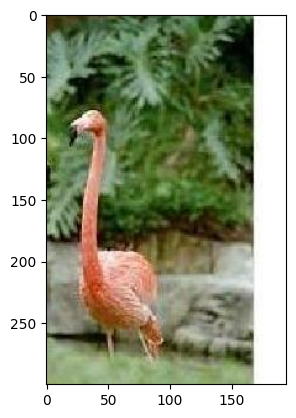

Output:  [0.17420433]
Label: 0

 Pizza Test Image:


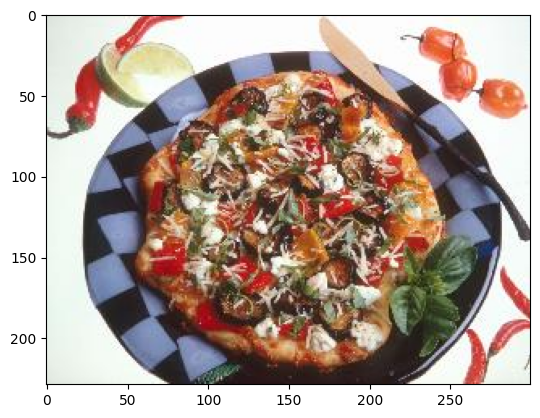

Output:  [1.30380801]
Label: 1


In [23]:
if __name__=="__main__":
  read_flamingo() #cannon fotoğraflarını okuyan fonksiyon çağrılıyor
  read_pizza() #cellphone fotoğraflarını okuyan fonksiyon çağrılıyor

  inputs=np.hstack((train_img,bias)) #datasetten alınan train_img dizisine bias değeri ekleniyor
  trainPerceptron(inputs, t, weights, 0.0001, 1000) #eğitim için trainPerceptron fonksiyonu çağrılıyor

  #test için her iki sınıftan da bir fotoğraf test fonksiyonuna gönderiliyor ve çıktılar ekrana bastırılıyor
  print('\n Flamingo Test Image:')
  output, label = test(r'CaltechTinySplit\test\flamingo\image_0041.jpg')
  print('Output: ',output)
  print('Label:', label)
  print('\n Pizza Test Image:')
  output, label = test('CaltechTinySplit/test/pizza/image_0037.jpg')
  print('Output: ',output)
  print('Label:', label)